# PCA Shape Mode Visualizations

In this analysis we load the eigenvectors that have been already computed and then project the shape modes from the IC sensitivity analysis.The goal is to visualize how closely-spaced ICs diverge over time.



In [11]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

# Create a folder for storing Publication figures

publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure3'

import _figure_parameters


# Plots of Shape Mode trajectories

37501
SimResults_00_analysis.csv
10
1.4


<IPython.core.display.Javascript object>


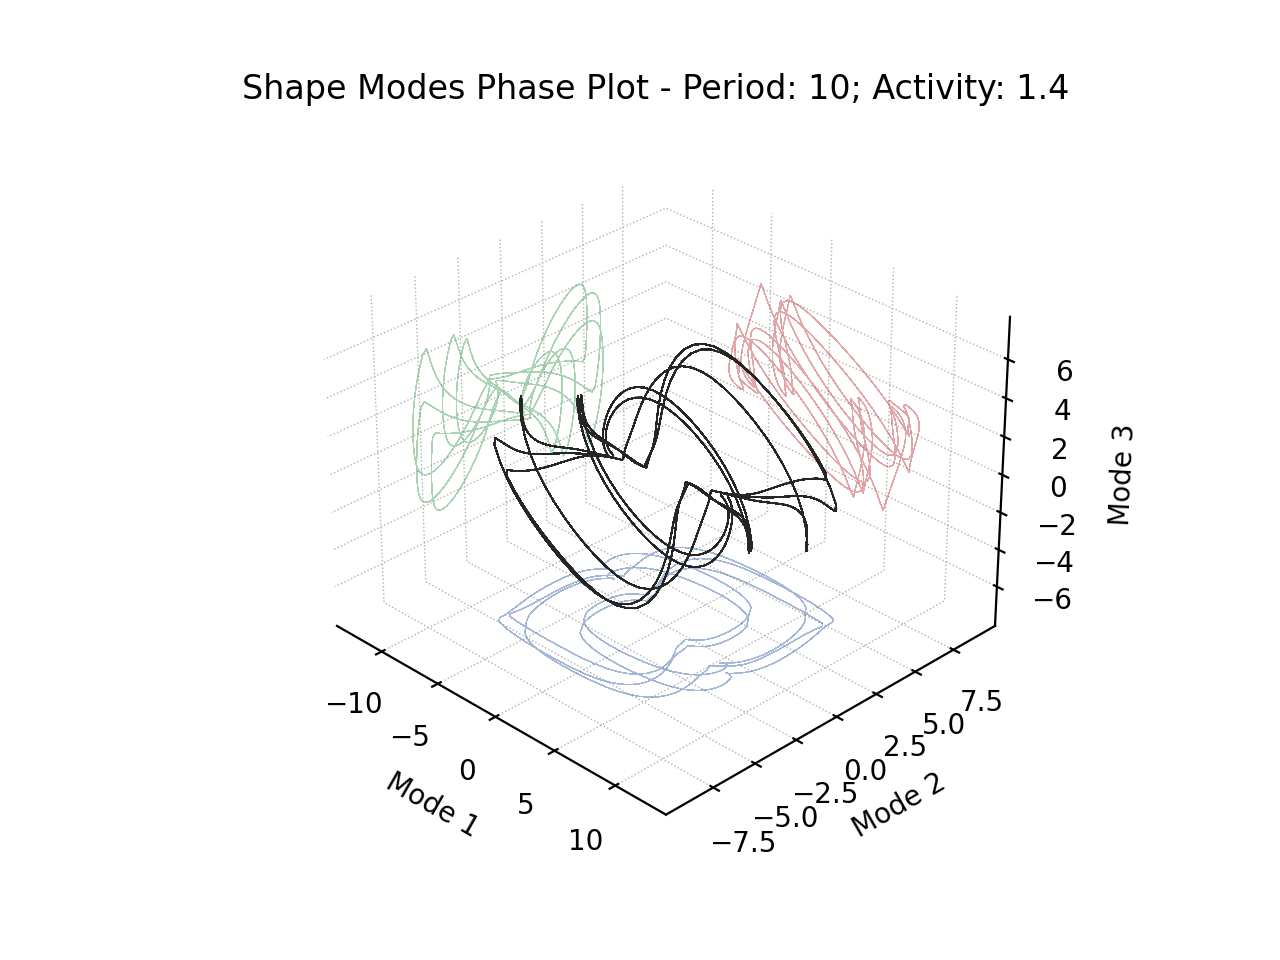

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [3]:

# Load the file 

# Period 2
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.205128205128205_activityTime_750_simType_point/Analysis/SimResults_00_ModeAmplitudes.csv'

# Aperiodic
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/Analysis/SimResults_00_ModeAmplitudes.csv'

# Aperiodic
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.0769230769230769_activityTime_750_simType_point/Analysis/SimResults_00_ModeAmplitudes.csv'

# Periodic 6
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5897435897435896_activityTime_750_simType_point/Analysis/SimResults_00_ModeAmplitudes.csv'

#Period 10
file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.3974358974358974_activityTime_750_simType_point/Analysis/SimResults_00_ModeAmplitudes.csv'



df_shape_modes = pd.read_csv(file)

df_shape_modes

mode_1, mode_2, mode_3 = np.array(df_shape_modes['Mode 1 amplitude'][:]), np.array(df_shape_modes['Mode 2 amplitude'][:]), np.array(df_shape_modes['Mode 3 amplitude'][:])

Nt = len(mode_1)

print(Nt)

# Load the metadata for the simulation
root_folder, folder = os.path.split(file)
metadata_file = folder[:-18]+'analysis.csv'

print(metadata_file)

df_metadata = pd.read_csv(os.path.join(root_folder, metadata_file))
period = np.array(df_metadata['period'][0])

sim_completed = df_metadata['simulation completed'][0]


if(np.isnan(period) and sim_completed==True):
    period = 'Aperiodic'
    
print(period)

activity_strength = np.round(df_metadata['potDipole strength'][0],2)

print(activity_strength)

%matplotlib notebook
plt.style.use('default')

title = 'Shape Modes Phase Plot - Period: {}; Activity: {}'.format(period, activity_strength)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

x = mode_1[int(Nt/2):]
y = mode_2[int(Nt/2):]
z = mode_3[int(Nt/2):]

x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
z_min, z_max = np.min(z), np.max(z)

x_extent, y_extent, z_extent = x_max - x_min, y_max - y_min, z_max - z_min

scale_factor = 0.35
x_min, x_max = x_min - scale_factor*x_extent, x_max + scale_factor*x_extent
y_min, y_max = y_min - scale_factor*y_extent, y_max + scale_factor*y_extent
z_min, z_max = z_min - scale_factor*z_extent, z_max + scale_factor*z_extent


# 3D plot forma
elev = 30
azim = -45

fig = plt.figure()
plt.title(title)

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, z, 'r', zdir='y', zs= y_max, linewidth = 0.25, alpha = 0.5)
ax.plot(y, z, 'g', zdir='x', zs= x_min, linewidth = 0.25,  alpha = 0.5)
ax.plot(x, y, 'b', zdir='z', zs= z_min, linewidth = 0.25,  alpha = 0.5)

ax.plot3D(x, y, z, linewidth = 0.5, color = 'k', alpha = 0.95)


ax.set_xlabel('Mode 1')
ax.set_ylabel('Mode 2')
ax.set_zlabel('Mode 3')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.xaxis._axinfo["grid"].update({"linewidth":0.5})
ax.yaxis._axinfo["grid"].update({"linewidth":0.5})
ax.zaxis._axinfo["grid"].update({"linewidth":0.5})

ax.xaxis._axinfo["grid"]['linestyle'] = ":"
ax.yaxis._axinfo["grid"]['linestyle'] = ":"
ax.zaxis._axinfo["grid"]['linestyle'] = ":"

ax.set_title(title)
ax.view_init(elev= elev, azim = azim)

# plt.savefig(os.path.join(publication_figures, title + '_elev_{}_azim_{}'.format(elev, azim)+'.png'), dpi = 300)
# plt.savefig(os.path.join(publication_figures, title + '_elev_{}_azim_{}'.format(elev, azim)+'.svg'), dpi = 300)
plt.show()

# Evolution of closely spaced ICs (in Real-space and Shape-space)

In [46]:
# Load the simulation of interest.

# period 2
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point/SimResults_07_.hdf5'

# Period 6
file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point/SimResults_07_.hdf5'


# Aperiodic
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point/SimResults_07_.hdf5'

filament = analysis.analysisTools(file = file)



# Load the eigenvectors for the simulation of interest

filament.load_eigenvectors()



In [47]:
# Load the closely-spaced initial conditions we want to visualize

# periodic 2:
# ic_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point/IC_analysis/IC_36886/IC_Sim_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point'

# Period 6
ic_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point/IC_analysis/IC_37051/IC_Sim_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point'

# Aperiodic
# ic_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point/IC_analysis/IC_37315/IC_Sim_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point'

ic_files = [file for file in os.listdir(ic_folder) if file.endswith('.hdf5')]


shape_amplitudes = {file:np.zeros((len(filament.eigenvectors_sig), filament.n_sig_eigenvalues)) for file in ic_files}


In [48]:
for file in ic_files:
    
    ic_fil = analysis.analysisTools(file = os.path.join(ic_folder, file))
    
    ic_fil.compute_tangent_angle_matrix()
    
    ic_fil.compute_shape_covariance_matrix()
    
    # Use the common eigenvectors as a basis
    ic_fil.n_sig_eigenvalues = filament.n_sig_eigenvalues
    ic_fil.eigenvectors_sig = filament.eigenvectors_sig
    
    # Project the current filament shapes onto the common basis
    ic_fil.project_filament_shapes()
    
    shape_amplitudes[file] = ic_fil.mode_amplitudes
    


No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)
No:of spatial points: 100
No:of time points: 3751
(3751, 100)
(3751, 100)


## Plot the mode amplitudes from the full simulation and then plot the evolution of closely-spaced ICs

In [49]:
shape_file = [file for file in os.listdir(filament.analysisFolder) if 'ModeAmplitudes' in file]

df_shape_modes = pd.read_csv(os.path.join(filament.analysisFolder, shape_file[0]))


37501
1.59


<IPython.core.display.Javascript object>


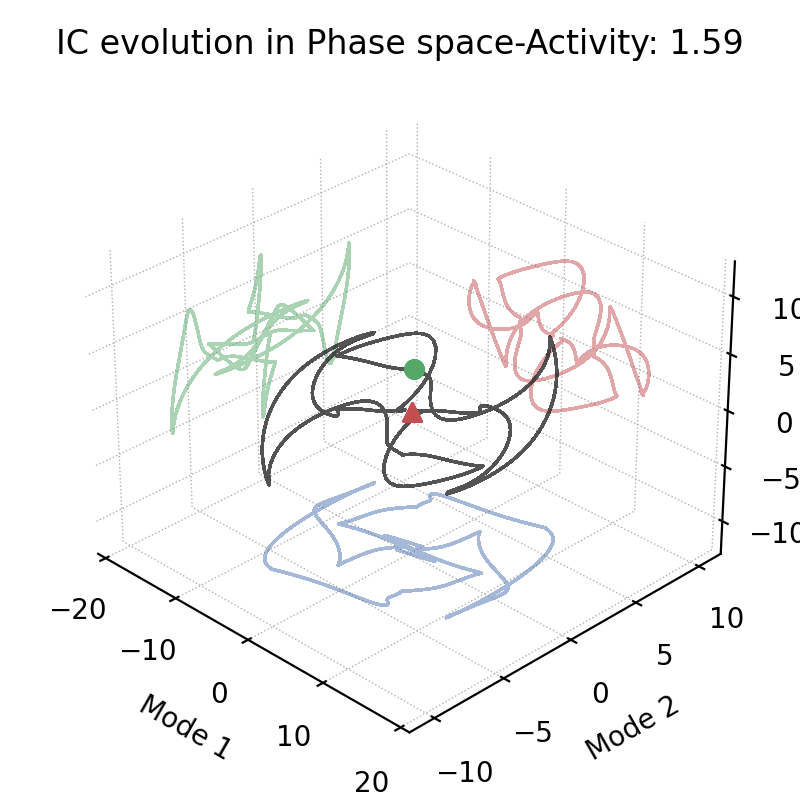

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [53]:
df_shape_modes
save = True

mode_1, mode_2, mode_3 = np.array(df_shape_modes['Mode 1 amplitude'][:]), np.array(df_shape_modes['Mode 2 amplitude'][:]), np.array(df_shape_modes['Mode 3 amplitude'][:])

Nt = len(mode_1)

print(Nt)

# Load the metadata for the simulation

activity_strength = np.round(filament.df_metadata['potDipole strength'][0],2)

print(activity_strength)

%matplotlib notebook
plt.style.use('default')

title = 'IC evolution in Phase space-Activity: {}'.format(activity_strength)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

x = mode_1[int(Nt/2):]
y = mode_2[int(Nt/2):]
z = mode_3[int(Nt/2):]

x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
z_min, z_max = np.min(z), np.max(z)

x_extent, y_extent, z_extent = x_max - x_min, y_max - y_min, z_max - z_min

scale_factor = 0.35
x_min, x_max = x_min - scale_factor*x_extent, x_max + scale_factor*x_extent
y_min, y_max = y_min - scale_factor*y_extent, y_max + scale_factor*y_extent
z_min, z_max = z_min - scale_factor*z_extent, z_max + scale_factor*z_extent

# 3D plot formatting
elev = 30
azim = -45

fig = plt.figure(figsize=(4,4))
plt.title(title)

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, z, 'r', zdir='y', zs= y_max, linewidth = 1, alpha = 0.5)
ax.plot(y, z, 'g', zdir='x', zs= x_min, linewidth = 1,  alpha = 0.5)
ax.plot(x, y, 'b', zdir='z', zs= z_min, linewidth = 1,  alpha = 0.5)

ax.plot3D(x, y, z, linewidth = 1, color = 'k', alpha = 0.75)

# Plot the first and last positions of the IC simulations


for file in ic_files:
    
    x_amp, y_amp, z_amp = shape_amplitudes[file][:,0], shape_amplitudes[file][:,1], shape_amplitudes[file][:,2]
    
    N_time_ic = int(len(x_amp))
    n_time = int(N_time_ic/2)
    
    ax.scatter(x_amp[0], y_amp[0], z_amp[0], marker = 'o', color = 'g', alpha =0.8, s= 40)
    
#     ax.scatter(x_amp[n_time], y_amp[n_time], z_amp[n_time], marker = 's', color = 'b', alpha =0.8, s=20)

    ax.scatter(x_amp[-1], y_amp[-1], z_amp[-1], marker = '^', color = 'r', alpha =0.8, s=40)
    
#     ax.plot(x_amp[0], z_amp[0], 'k', zdir='y', zs= y_max, linewidth = 0.25, alpha = 0.5, marker = 'o')
#     ax.plot(y_amp[0], z_amp[0], 'k', zdir='x', zs= x_min, linewidth = 0.25,  alpha = 0.5, marker = 'o')
#     ax.plot(x_amp[0], y_amp[0], 'k', zdir='z', zs= z_min, linewidth = 0.25,  alpha = 0.5, marker = 'o')
    
#     ax.plot(x_amp[-1], z_amp[-1], 'k', zdir='y', zs= y_max, linewidth = 0.25, alpha = 0.5, marker = '^')
#     ax.plot(y_amp[-1], z_amp[-1], 'k', zdir='x', zs= x_min, linewidth = 0.25,  alpha = 0.5, marker = '^')
#     ax.plot(x_amp[-1], y_amp[-1], 'k', zdir='z', zs= z_min, linewidth = 0.25,  alpha = 0.5, marker = '^')
    

ax.set_xlabel('Mode 1')
ax.set_ylabel('Mode 2')
ax.set_zlabel('Mode 3')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.xaxis._axinfo["grid"].update({"linewidth":0.5})
ax.yaxis._axinfo["grid"].update({"linewidth":0.5})
ax.zaxis._axinfo["grid"].update({"linewidth":0.5})

ax.xaxis._axinfo["grid"]['linestyle'] = ":"
ax.yaxis._axinfo["grid"]['linestyle'] = ":"
ax.zaxis._axinfo["grid"]['linestyle'] = ":"

ax.set_title(title)
ax.view_init(elev= elev, azim = azim)
plt.tight_layout()

if save:
    plt.savefig(os.path.join(publication_figures, title + '_elev_{}_azim_{}'.format(elev, azim)+'.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '_elev_{}_azim_{}'.format(elev, azim)+'.svg'), dpi = 300)


<IPython.core.display.Javascript object>


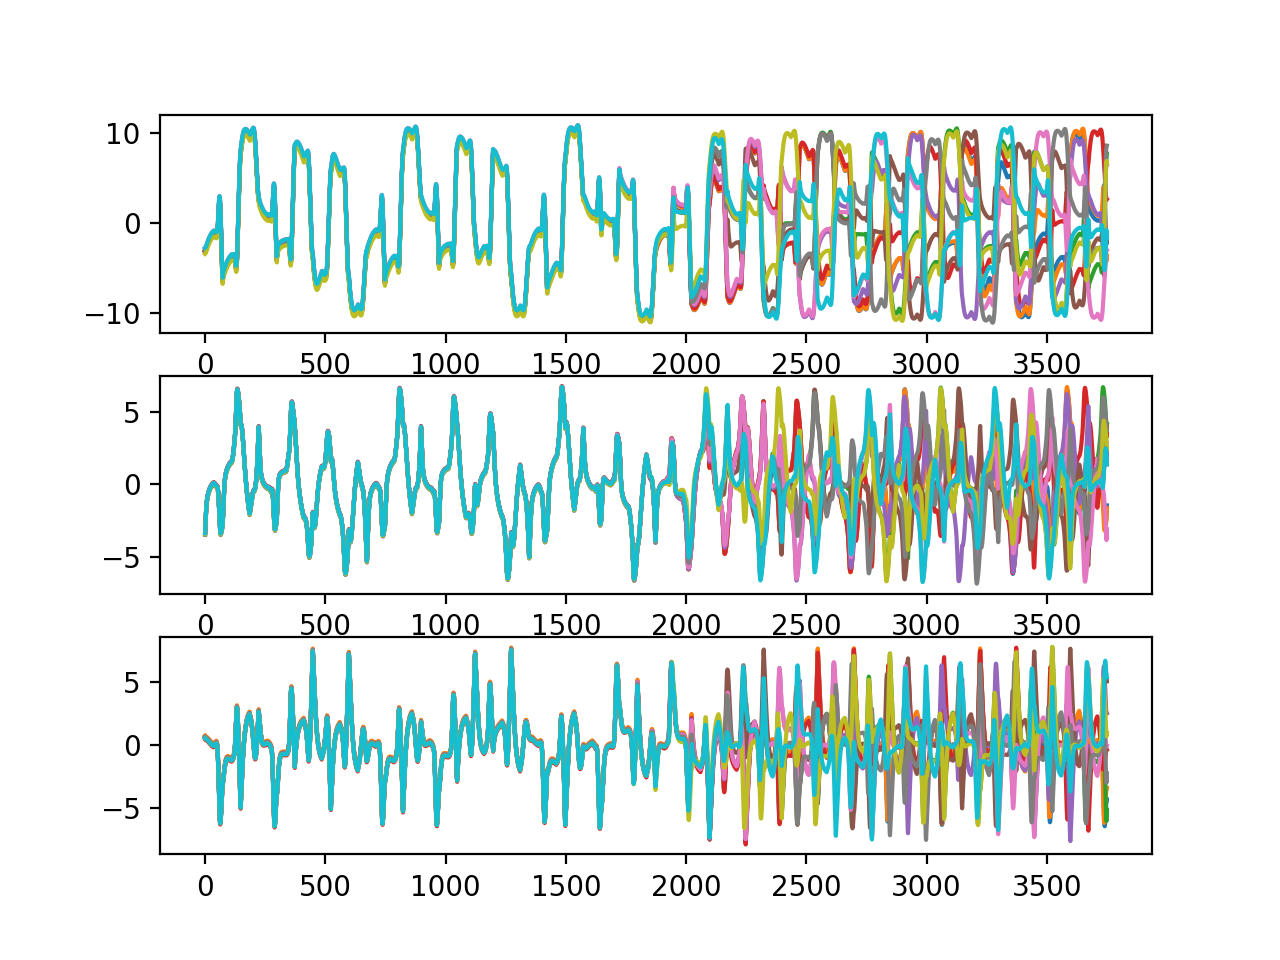

In [33]:
# Plot the mode amplitudes vs Time
fig, axs = plt.subplots(nrows =3, ncols = 1)
for file in ic_files:
    
    x_amp, y_amp, z_amp = shape_amplitudes[file][:,0], shape_amplitudes[file][:,1], shape_amplitudes[file][:,2]
    
    axs[0].plot(x_amp)
    axs[1].plot(y_amp)
    axs[2].plot(z_amp)
    
plt.show()
    
    

## Plot the Filament Shape at Start and End (starting from closely spaced ICs)

In [82]:

# Periodic (2)
# ic_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point/IC_analysis/IC_36886/IC_Sim_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point'

# Periodic (6)
# ic_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point/IC_analysis/IC_37051/IC_Sim_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point'

# Aperiodic
ic_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/IC_analysis_ForVisualization/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point/IC_analysis/IC_37315/IC_Sim_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point'

ic_files = [file for file in os.listdir(ic_folder) if file.endswith('.hdf5')]

base_tip_angles = {file:[] for file in ic_files}

fil_shape_start = {file:[] for file in ic_files}
fil_shape_end =  {file:[] for file in ic_files}

# Store the base-tip angles and filament shapes at the start and end of simulations
for file in ic_files:
    
    ic_fil = analysis.analysisTools(file = os.path.join(ic_folder, file))
    
    activity_strength = np.round(ic_fil.df_metadata['potDipole strength'][0],2)

    
    ic_fil.compute_base_tip_angle()
    
    base_tip_angles[file] = (ic_fil.Time/ic_fil.activity_timescale, ic_fil.derived_data['base tip angle'][:])
    
    first_index = 0
    second_index = ic_fil.Np
    
    r = ic_fil.R[0,:]
    
    x_pos = r[first_index:first_index+ic_fil.Np]
    y_pos = r[second_index:second_index+ic_fil.Np]
    
    fil_shape_start[file] = (x_pos, y_pos)
    
    r = ic_fil.R[-1,:]
    
    x_pos = r[first_index:first_index+ic_fil.Np]
    y_pos = r[second_index:second_index+ic_fil.Np]
    
    fil_shape_end[file] = (x_pos, y_pos)
    
    

<IPython.core.display.Javascript object>


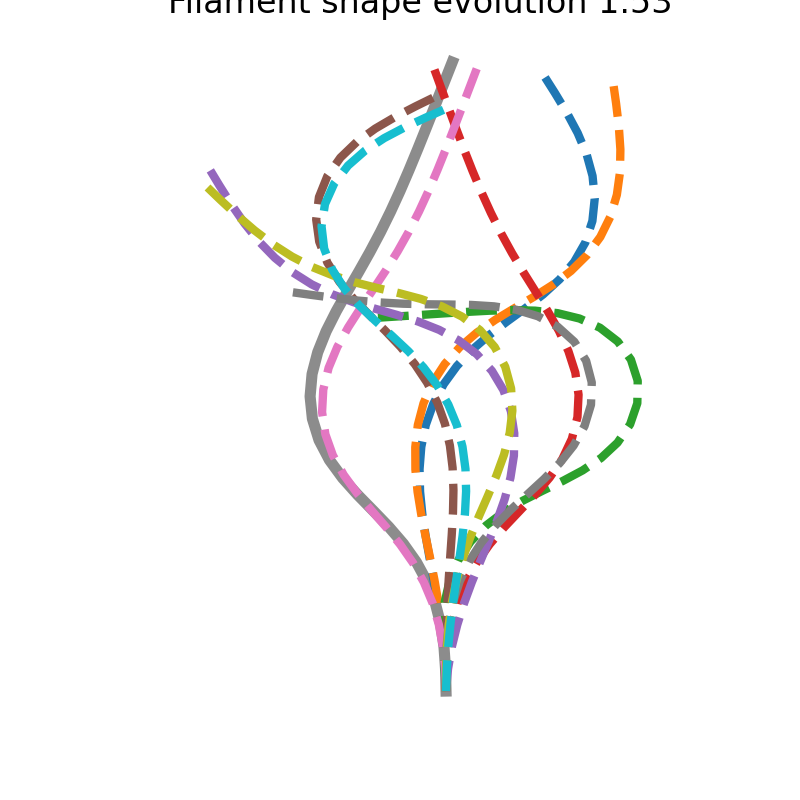

In [83]:
# Plot the filament shape
save = True
title = 'Filament shape evolution {}'.format(activity_strength)
    
cmap = cm.get_cmap('tab10', 255)
# cmap = sns.color_palette()
colors = [cmap(ii) for ii in np.linspace(0,1,len(ic_files))]


plt.figure(figsize = (4,4))

for ii, file in enumerate(ic_files):
    
    x_pos_start, y_pos_start = fil_shape_start[file]
    x_pos_end, y_pos_end = fil_shape_end[file]
    
#     plt.scatter(y_pos_start, x_pos_start, color = 'k', s= 10)
    if(ii==0):
        plt.plot(y_pos_start, x_pos_start, color = 'k', linewidth = 4, alpha = 0.5)
    
#     plt.scatter(y_pos_end, x_pos_end, color = colors[ii], s=10)
    plt.plot(y_pos_end, x_pos_end, color = colors[ii], linewidth = 3, linestyle = '--', alpha =1)
    

plt.axis('equal')
plt.tight_layout()
plt.title(title)
plt.axis('off')

if(save):
    
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()
   
    
    



## Plot the evolution of the base-tip angle starting from closely-spaced ICs

<IPython.core.display.Javascript object>


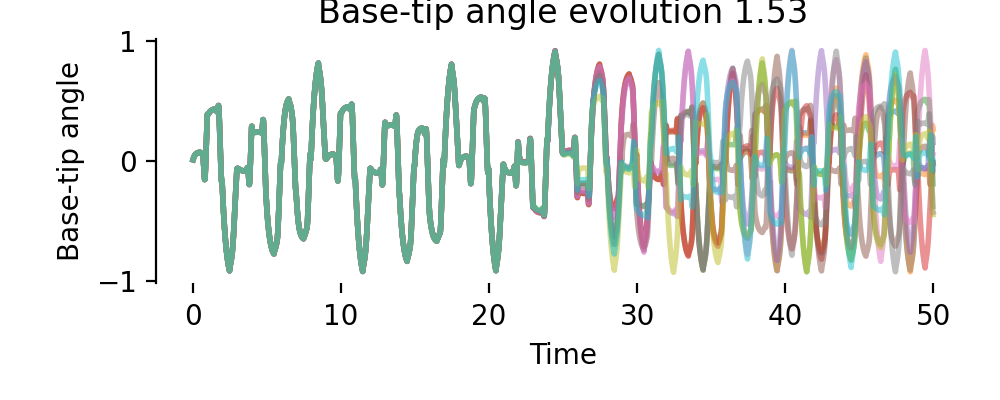

In [63]:
save = True
title = 'Base-tip angle evolution {}'.format(activity_strength)

plt.figure(figsize = (5,2))

for ii, file in enumerate(ic_files):
    
    time, base_tip_angle_ic = base_tip_angles[file]
    
    plt.plot(time, base_tip_angle_ic, linewidth = 2, color = colors[ii], alpha = 0.5)
    
plt.xlabel('Time')
plt.ylabel('Base-tip angle')

plt.tight_layout()
plt.title(title)

sns.despine(bottom = True)

if(save):
    
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    

plt.show()
    
    
